# Health Insurance Costs

Objective: The objective of this analysis is to determine whether Smokers have statistically higher mean individual 
medical costs billed by health insurance than do non-smokers. 
Furthermore, is a person's BMI correlated with individual medical costs billed by health insurance?

In [1]:
#Importing the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [2]:
# Importing the dataset
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Let us understand the attributes:
sex: insurance contractor gender, female, male
bmi: Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height, 
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking (Yes or No)
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance

Now let us find out if we have any null value in the given dataset and also understand the data a bit better

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


We do not have any Null Values and there are 1338 rows

In [5]:
# Trying to understand the Charges By Age and Sex

Text(0.5, 1.0, 'Distribution of charges by age and sex')

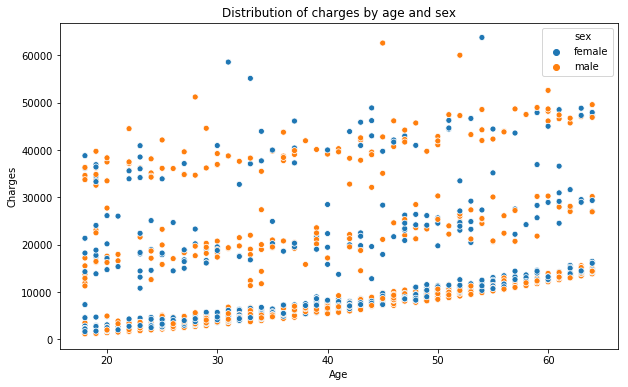

In [6]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "age", y = "charges", data = data, hue = "sex")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by Age and Sex")

With the above depiction we can infer that the Charges do increase as Age progresses. However, there is no clear difference in charges for male vs female.

Text(0.5, 1.0, 'Distribution of Charges by BMI and Smoker')

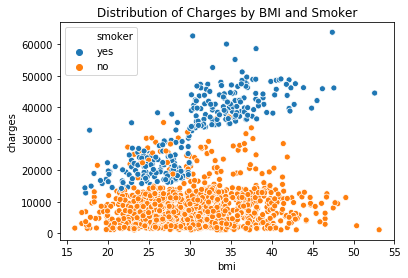

In [7]:
sns.scatterplot(data['bmi'], data['charges'],data['smoker'])
plt.title("Distribution of Charges by BMI and Smoker")

Despite the BMI indicator is used to measure health risk for an individual, the feature is not as important as knowing whether the individual is a smoker or non-smoker.

Smoker tends to incur a much higher charge as compared to non-smoker. When the BMI of a smoker goes beyond 30, the charges increases to a minimum of 30000. Non-smoker with BMI > 30 generally have charges incurred below 30000

Now, let us try to understand if there is any relation of charges with region and gender.

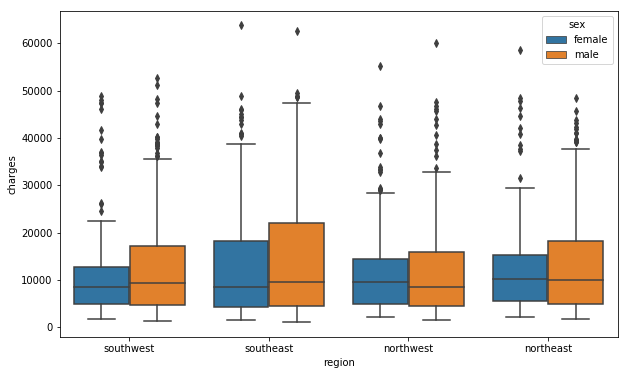

In [8]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "region", y = "charges", hue = "sex", data = data)

Across south west, north west and north east, the charges are rather similar. 
However, individuals from south east has a wider range of charges for both sexes. 
Each individual should be categorized as either from southeast or not from southeast region.

Charges by Smoker and Number of Children

Text(0.5, 1.0, 'Smokers and Non-smokers')

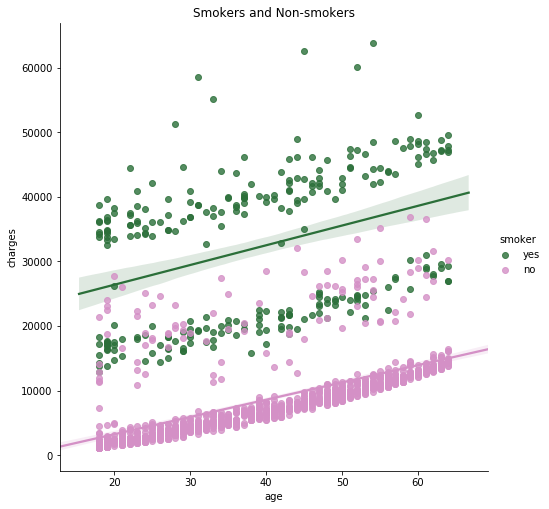

In [9]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data,palette = "cubehelix", height = 7)
plt.title('Smokers and Non-smokers')

Text(0.5, 1.0, 'Distribution of Charges by Number of Children')

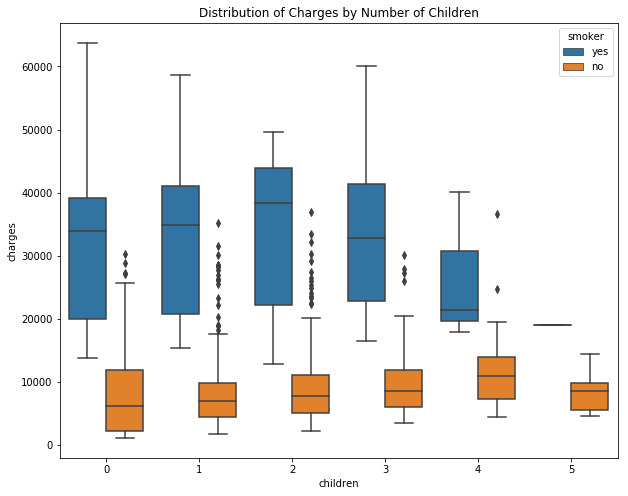

In [10]:
plt.figure(figsize = (10,8))
sns.boxplot(x = "children", y = "charges",hue = "smoker", data = data)
plt.title("Distribution of Charges by Number of Children")

Smokers generally make claims with minimum amount of approximately 15000 regardless of number of children whereas
non-smokers make a maximum claim of 20000 (typically below 15000), with few exceptions.

Smoking is definitely an important feature to take note in modelling.

# Transforming categorical features to numerical values

In [11]:
data["smoker"] = data["smoker"].replace(["yes","no"], [1,0])
data["sex"] = data["sex"].replace(["male","female"], [1,0])
data["region_southeast"] = data["region"].apply(lambda x: 1 if x == "southeast" else 0)

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges,region_southeast
0,19,0,27.900,0,1,southwest,16884.92400,0
1,18,1,33.770,1,0,southeast,1725.55230,1
2,28,1,33.000,3,0,southeast,4449.46200,1
3,33,1,22.705,0,0,northwest,21984.47061,0
4,32,1,28.880,0,0,northwest,3866.85520,0


# Correlation between the Features

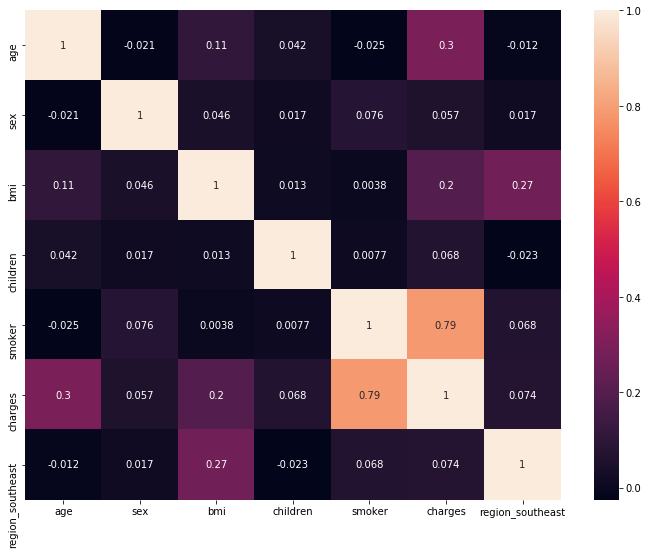

In [13]:
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), annot = True)

A strong positive correlation is observed between being Smoker and Insurance Charges

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

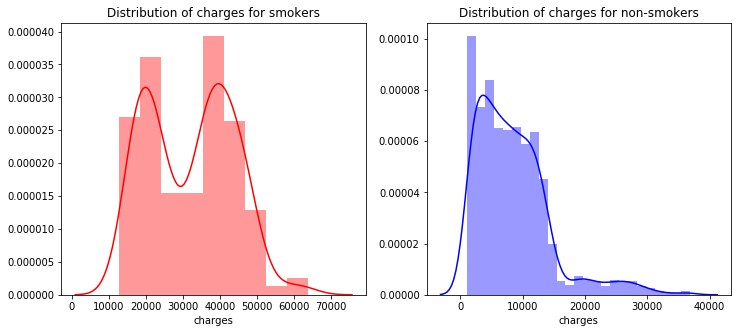

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.distplot(data[(data.smoker == 1)] ["charges"],color='r')
plt.title('Distribution of charges for smokers')

plt.subplot(122)
sns.distplot(data[(data.smoker == 0)] ['charges'],color='b')
plt.title('Distribution of charges for non-smokers')

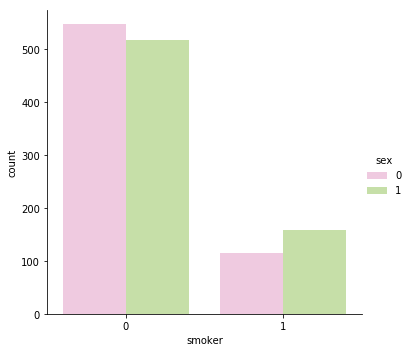

In [15]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="PiYG", data=data)

Male coded as 1 & Female coded as 0
Smoker coded as 1 & Non-smoker coded as 0
We can infer that there are more number of Male Smokers than Female Smokers.
Now let us understand if there is a relation between the charges and gender with respect to smoking habit

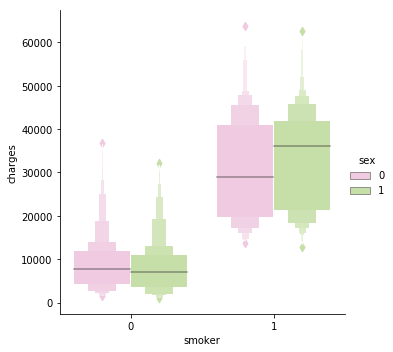

In [16]:
sns.catplot(x="smoker", y="charges", hue="sex", kind="boxen", data=data, palette = 'PiYG')

Looks like for Non-smokers, there is not much of a difference between the charges for either male or female.
However, for female smokers the charges are little below 30000 but for male smokers the charges are nearing 40000.

# Linear Regression Model

In [17]:
# Splitting the dataset into training and test
y = data["charges"]
X = data.drop(["charges","region"], axis = 1)
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
# Training the model and then we are using on the test dataset
model = LinearRegression()
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Model Score_R2 :", model.score(X_test, y_test))
print("MSE :", mean_squared_error(y_test, y_test_pred))

Model Score_R2 : 0.7900602753674886
MSE : 33478975.592402842


Smoking is a huge factor as compared to other features. Just by being a smoker, the charge increases by approximately 25,000 regardless of age. 
Thereafter, the charges increase with age, bmi (higher health risk) and children (insurance is increasingly important with dependents).

# Residuals

Positive residual means that the actual charge > predicted charge
Negative residual means that the actual charge < predicted charge

Text(0, 0.5, 'Residual_Train')

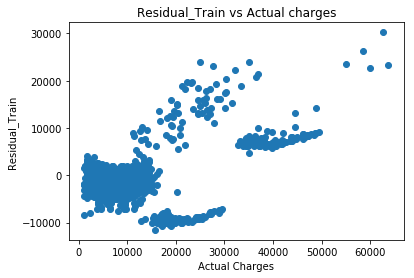

In [19]:
residual_train = y_train-y_train_pred
plt.scatter(y_train, residual_train)
plt.title("Residual_Train vs Actual charges")
plt.xlabel("Actual Charges")
plt.ylabel("Residual_Train")

Text(0, 0.5, 'Residual_Test')

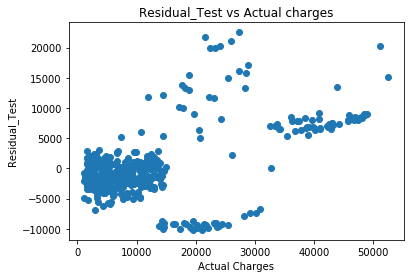

In [20]:
residual_test = y_test-y_test_pred
plt.scatter(y_test, residual_test)
plt.title("Residual_Test vs Actual charges")
plt.xlabel("Actual Charges")
plt.ylabel("Residual_Test")

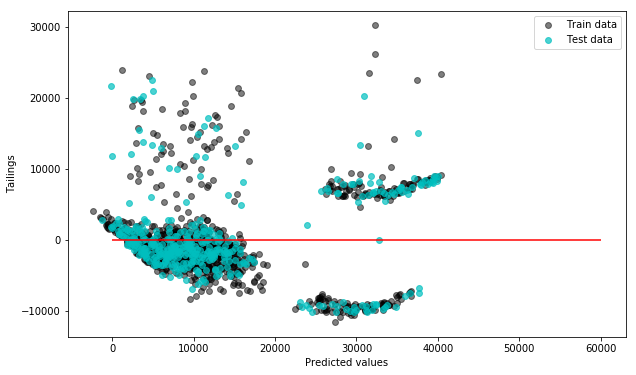

In [21]:
plt.figure(figsize=(10,6))

plt.scatter(y_train_pred, residual_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, residual_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend()
plt.hlines(y = 0, xmin = 0, xmax = 60000, color = 'red')
plt.show()

The model is great for charges less than 15,000 as the residual is within 5000.
However, the model breaks down at higher charge (> 15,000) as the residual very significant. 
The model could over predict the actual charge by 10,000 or more, 
or under predict the actual charge by minimally 5,000.